<a href="https://colab.research.google.com/github/OJB-Quantum/Generative-Layout-Notebooks/blob/main/GDSTK_Canopy_H%E2%80%91Tree_Fractals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 534.7/534.7 kB 13.6 MB/s eta 0:00:00


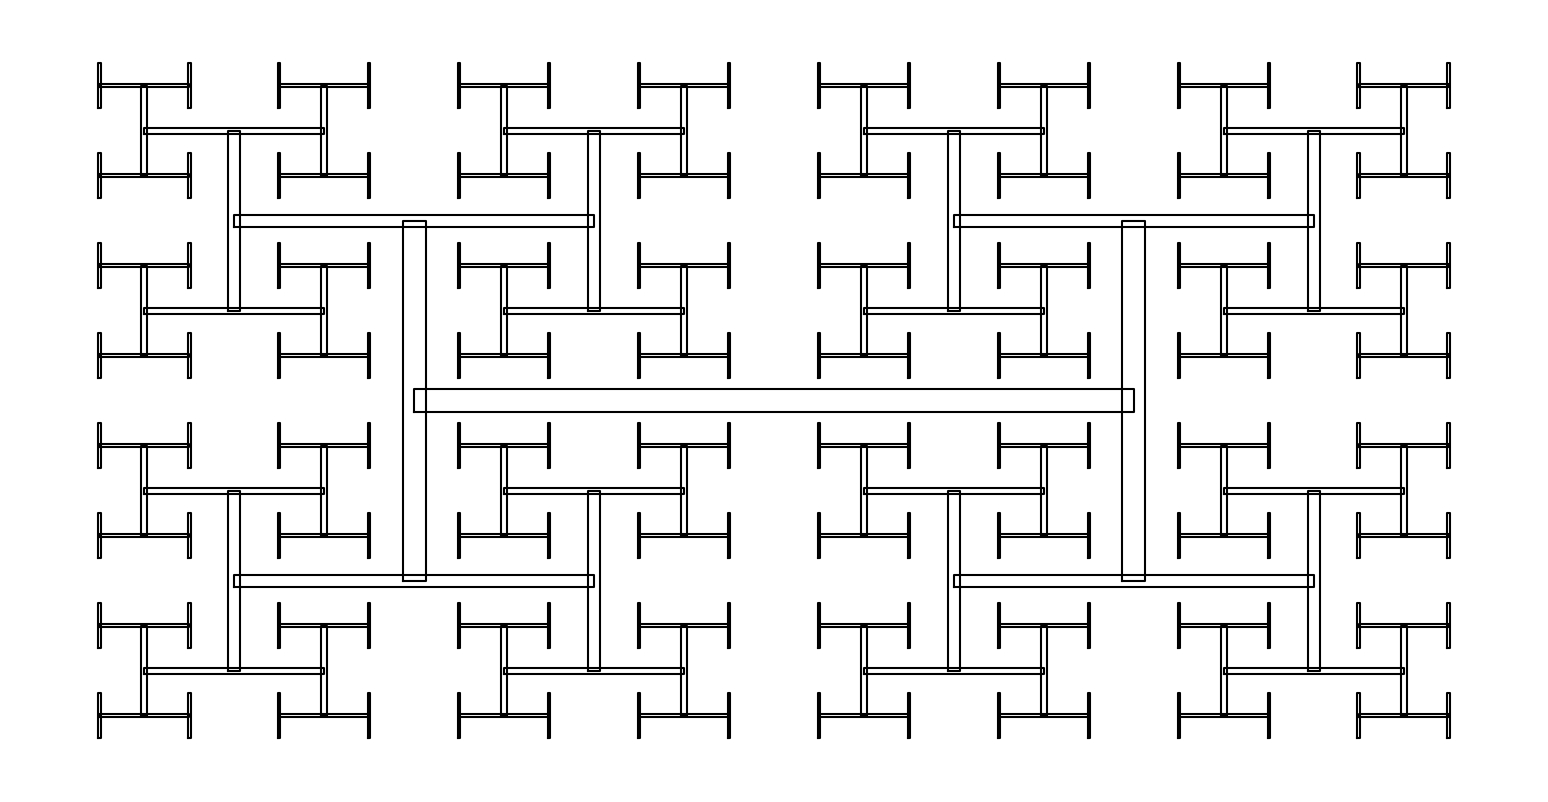

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:
# Google Colab Notebook — 4th‑Order Canopy H‑Tree Fractal (GDSTK)
#
# Author : Onri Jay Benally
# Date   : 2025‑06‑04 — patched
# -------------------------------------------------------------
# This cell installs/updates GDSTK (>=0.9.53) so it works with NumPy ≥2.0,
# draws a 4‑order canopy H‑tree whose narrowest linewidth is 400 nm,
# previews it with Matplotlib at 300 dpi, writes out `htree_order4.gds`,
# and triggers a download in Colab.
# -------------------------------------------------------------
# ↳ Jump straight to the **“Parameters”** section to tweak order, lengths,
#    and line‑width scaling if desired.

# %% Install / upgrade GDSTK (supports NumPy 2.x)
!pip install --quiet --upgrade "gdstk>=0.9.53"

# %% Imports
import importlib, sys, subprocess, types
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams["figure.dpi"] = 300

import gdstk  # now import works with NumPy 2.x

# %% Parameters
ORDER = 4          # fractal order (depth)
W_MIN = 0.4        # µm — target linewidth of thinnest branches (400 nm)
LEN_ROOT = 100.0   # µm — horizontal span of the top‑level H bar
LAYER = 1          # GDS layer number for all polygons

# Derived — root linewidth grows by factor 2 per level so it halves on each rec.
ROOT_WID = W_MIN * (2 ** (ORDER - 1))

# %% Build the H‑tree recursively ------------------------------------------------
lib = gdstk.Library()
cell = lib.new_cell("HTREE4")


def htree(c, x, y, length, width, order):
    """Recursive canopy H‑tree centred at (x, y)."""
    if order == 0:
        return

    # Horizontal bar -----------------------------------------------------------
    c.add(gdstk.rectangle((x - length / 2, y - width / 2),
                          (x + length / 2, y + width / 2),
                          layer=LAYER))

    # Vertical stems at the ends ----------------------------------------------
    stem_len = length / 2
    half_w   = width / 2

    for sign in (-1, +1):  # left/right stems
        stem_x = x + sign * (length / 2)
        c.add(gdstk.rectangle((stem_x - half_w, y - stem_len / 2),
                              (stem_x + half_w, y + stem_len / 2),
                              layer=LAYER))

        # Recurse on both ends of each stem (upper & lower) -------------------
        htree(c,
              stem_x, y + stem_len / 2,  # upper tip
              length / 2, width / 2, order - 1)
        htree(c,
              stem_x, y - stem_len / 2,  # lower tip
              length / 2, width / 2, order - 1)


# Build the fractal ------------------------------------------------------------
htree(cell, 0.0, 0.0, LEN_ROOT, ROOT_WID, ORDER)

# %% Preview with Matplotlib ----------------------------------------------------
fig, ax = plt.subplots()
for poly in cell.polygons:  # gdstk.Polygon objects
    pts = np.asarray(poly.points)  # (N, 2)
    pts = np.vstack([pts, pts[0]])  # close polygon for plotting
    ax.plot(pts[:, 0], pts[:, 1], "k-", linewidth=0.5)
ax.set_aspect("equal")
ax.axis("off")
plt.show()

# %% Export GDS -----------------------------------------------------------------
lib.write_gds("htree_order4.gds")

# Colab convenience download (no‑op outside Colab)
try:
    from google.colab import files
    files.download("htree_order4.gds")
except Exception:
    pass

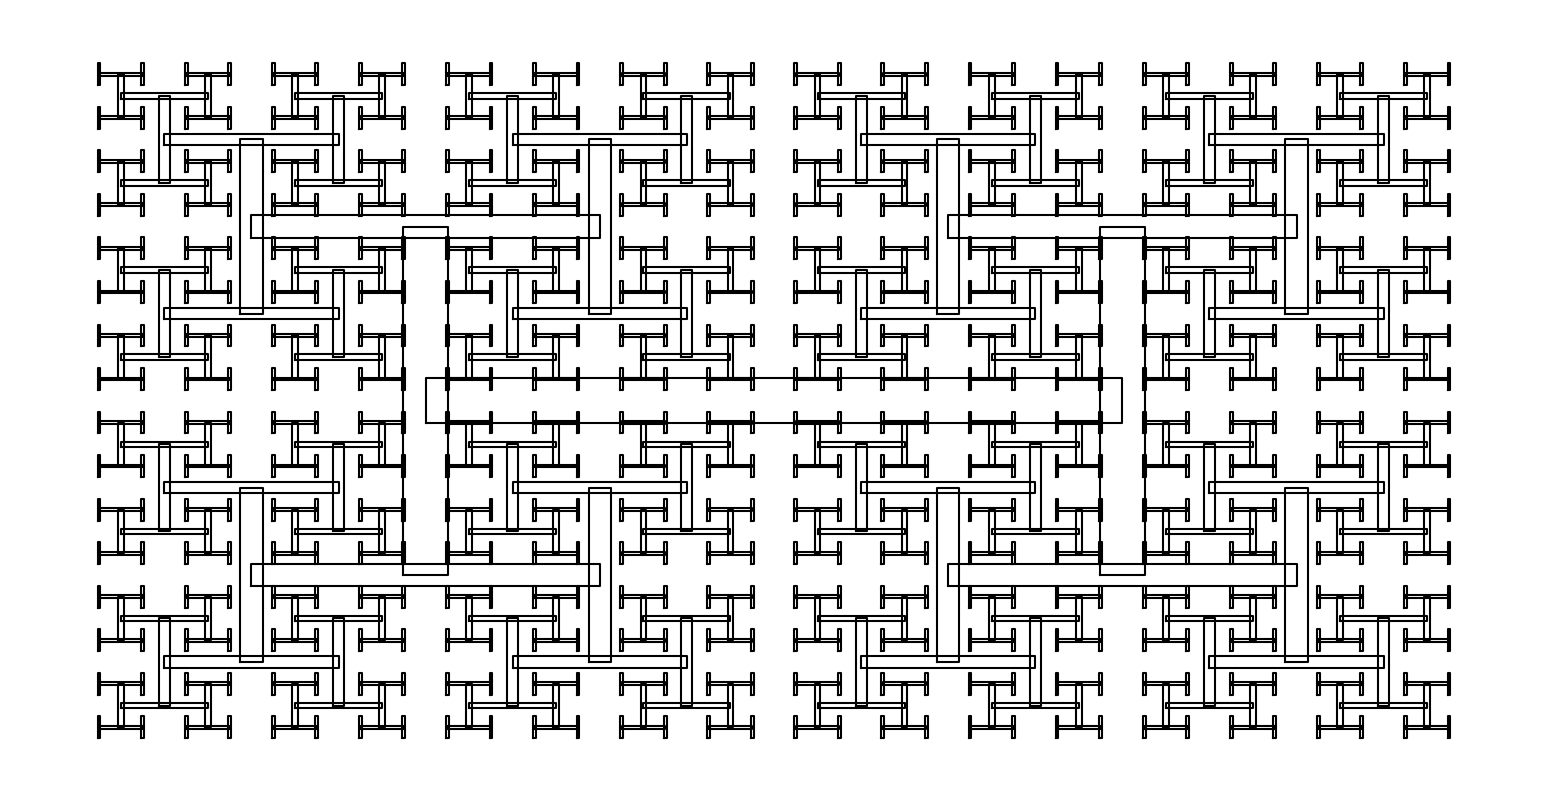

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [8]:
# Google Colab Notebook — 4th‑Order Canopy H‑Tree Fractal (GDSTK)
#
# Author : Onri Jay Benally
# Date   : 2025‑06‑04 — patched
# -------------------------------------------------------------
# This cell installs/updates GDSTK (>=0.9.53) so it works with NumPy ≥2.0,
# draws a 4‑order canopy H‑tree whose narrowest linewidth is 400 nm,
# previews it with Matplotlib at 300 dpi, writes out `htree_order4.gds`,
# and triggers a download in Colab.
# -------------------------------------------------------------
# ↳ Jump straight to the **“Parameters”** section to tweak order, lengths,
#    and line‑width scaling if desired.

# %% Install / upgrade GDSTK (supports NumPy 2.x)
# !pip install --quiet --upgrade "gdstk>=0.9.53"

# %% Imports
import importlib, sys, subprocess, types
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams["figure.dpi"] = 300

import gdstk  # now import works with NumPy 2.x

# %% Parameters
ORDER = 5          # fractal order (depth)
W_MIN = 0.4        # µm — target linewidth of thinnest branches (400 nm)
LEN_ROOT = 100.0   # µm — horizontal span of the top‑level H bar
LAYER = 1          # GDS layer number for all polygons

# Derived — root linewidth grows by factor 2 per level so it halves on each rec.
ROOT_WID = W_MIN * (2 ** (ORDER - 1))

# %% Build the H‑tree recursively ------------------------------------------------
lib = gdstk.Library()
cell = lib.new_cell("HTREE5")


def htree(c, x, y, length, width, order):
    """Recursive canopy H‑tree centred at (x, y)."""
    if order == 0:
        return

    # Horizontal bar -----------------------------------------------------------
    c.add(gdstk.rectangle((x - length / 2, y - width / 2),
                          (x + length / 2, y + width / 2),
                          layer=LAYER))

    # Vertical stems at the ends ----------------------------------------------
    stem_len = length / 2
    half_w   = width / 2

    for sign in (-1, +1):  # left/right stems
        stem_x = x + sign * (length / 2)
        c.add(gdstk.rectangle((stem_x - half_w, y - stem_len / 2),
                              (stem_x + half_w, y + stem_len / 2),
                              layer=LAYER))

        # Recurse on both ends of each stem (upper & lower) -------------------
        htree(c,
              stem_x, y + stem_len / 2,  # upper tip
              length / 2, width / 2, order - 1)
        htree(c,
              stem_x, y - stem_len / 2,  # lower tip
              length / 2, width / 2, order - 1)


# Build the fractal ------------------------------------------------------------
htree(cell, 0.0, 0.0, LEN_ROOT, ROOT_WID, ORDER)

# %% Preview with Matplotlib ----------------------------------------------------
fig, ax = plt.subplots()
for poly in cell.polygons:  # gdstk.Polygon objects
    pts = np.asarray(poly.points)  # (N, 2)
    pts = np.vstack([pts, pts[0]])  # close polygon for plotting
    ax.plot(pts[:, 0], pts[:, 1], "k-", linewidth=0.5)
ax.set_aspect("equal")
ax.axis("off")
plt.show()

# %% Export GDS -----------------------------------------------------------------
lib.write_gds("htree_order5.gds")

# Colab convenience download (no‑op outside Colab)
try:
    from google.colab import files
    files.download("htree_order5.gds")
except Exception:
    pass

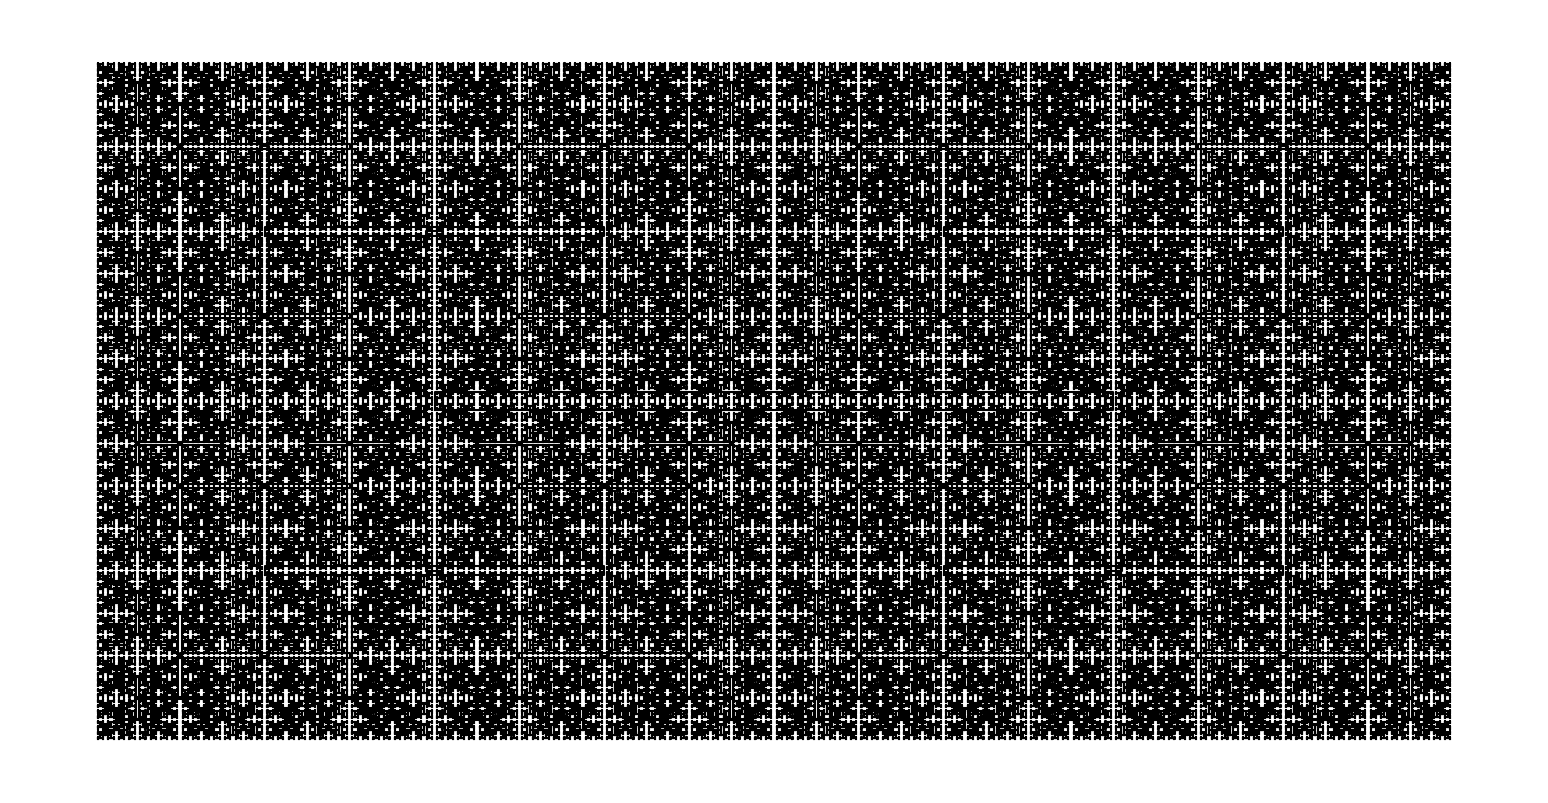

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [9]:
# Google Colab Notebook — 4th‑Order Canopy H‑Tree Fractal (GDSTK)
#
# Author : Onri Jay Benally
# Date   : 2025‑06‑04 — patched
# -------------------------------------------------------------
# This cell installs/updates GDSTK (>=0.9.53) so it works with NumPy ≥2.0,
# draws a 4‑order canopy H‑tree whose narrowest linewidth is 20 nm,
# previews it with Matplotlib at 300 dpi, writes out `htree_order4.gds`,
# and triggers a download in Colab.
# -------------------------------------------------------------
# ↳ Jump straight to the **“Parameters”** section to tweak order, lengths,
#    and line‑width scaling if desired.

# %% Install / upgrade GDSTK (supports NumPy 2.x)
# !pip install --quiet --upgrade "gdstk>=0.9.53"

# %% Imports
import importlib, sys, subprocess, types
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams["figure.dpi"] = 300

import gdstk  # now import works with NumPy 2.x

# %% Parameters
ORDER = 8          # fractal order (depth)
W_MIN = 0.02        # µm — target linewidth of thinnest branches (20 nm)
LEN_ROOT = 100.0   # µm — horizontal span of the top‑level H bar
LAYER = 1          # GDS layer number for all polygons

# Derived — root linewidth grows by factor 2 per level so it halves on each rec.
ROOT_WID = W_MIN * (2 ** (ORDER - 1))

# %% Build the H‑tree recursively ------------------------------------------------
lib = gdstk.Library()
cell = lib.new_cell("HTREE8")


def htree(c, x, y, length, width, order):
    """Recursive canopy H‑tree centred at (x, y)."""
    if order == 0:
        return

    # Horizontal bar -----------------------------------------------------------
    c.add(gdstk.rectangle((x - length / 2, y - width / 2),
                          (x + length / 2, y + width / 2),
                          layer=LAYER))

    # Vertical stems at the ends ----------------------------------------------
    stem_len = length / 2
    half_w   = width / 2

    for sign in (-1, +1):  # left/right stems
        stem_x = x + sign * (length / 2)
        c.add(gdstk.rectangle((stem_x - half_w, y - stem_len / 2),
                              (stem_x + half_w, y + stem_len / 2),
                              layer=LAYER))

        # Recurse on both ends of each stem (upper & lower) -------------------
        htree(c,
              stem_x, y + stem_len / 2,  # upper tip
              length / 2, width / 2, order - 1)
        htree(c,
              stem_x, y - stem_len / 2,  # lower tip
              length / 2, width / 2, order - 1)


# Build the fractal ------------------------------------------------------------
htree(cell, 0.0, 0.0, LEN_ROOT, ROOT_WID, ORDER)

# %% Preview with Matplotlib ----------------------------------------------------
fig, ax = plt.subplots()
for poly in cell.polygons:  # gdstk.Polygon objects
    pts = np.asarray(poly.points)  # (N, 2)
    pts = np.vstack([pts, pts[0]])  # close polygon for plotting
    ax.plot(pts[:, 0], pts[:, 1], "k-", linewidth=0.5)
ax.set_aspect("equal")
ax.axis("off")
plt.show()

# %% Export GDS -----------------------------------------------------------------
lib.write_gds("htree_order8.gds")

# Colab convenience download (no‑op outside Colab)
try:
    from google.colab import files
    files.download("htree_order8.gds")
except Exception:
    pass